In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Clean tables

In [100]:
hotel_num = 'hotel_3'

table_names = ['search_log_session', 'search_log', 'booking_data', 'search_log_room', 'search_log_room_offer','search_log_room_child', 'upsell_data', 'daily_occupancy', 'website_daily_users']

for x in table_names:
    globals()[x] = pd.read_csv('./../data-raw/'+hotel_num+'/'+x+'_'+hotel_num+'.csv', sep=';', encoding='ISO-8859-1')

## search_log_session table

In [86]:
search_log_session.tail()

,id,uuid,session_id,utm_source,utm_medium,utm_campaign
13043,29076,1886060082.1729285658,1729285711,hirlevel_s2,ct,hirlevel_c6
13044,29077,1586093179.1729285523,1729285715,google,cpc,(not set)
13045,29078,970729882.1729285726,1729285767,google,cpc,(not set)
13046,29079,1646288791.1729281306,1729286124,facebook,cpc,campaign_1
13047,29424,357970273.1729286470,1729288746,(direct),(none),(not set)


In [87]:
search_log_session['utm_source'].value_counts()

utm_source
google                       8888
(direct)                     1693
facebook                      936
bing                          231
hirlevel_s2                   158
l.facebook.com                 99
redir.d-edgeconnect.media      74
m.facebook.com                 69
live                           68
ajanlat                        42
l.instagram.com                29
instagram.com                  21
source_5                       14
lm.facebook.com                 8
www.wellcard.at                 7
www.saferpay.com                7
kereso.startlap.hu              6
hirlevel_s3                     5
hotelcms.hu                     4
source_6                        4
loyalty                         3
www.kapu.hu                     3
www.youtube.com                 3
webmail.telekom.hu              3
hirlevel_s1                     3
www.connexservice.com           2
source_8                        2
yahoo                           2
source_14                       2
sec

In [88]:
search_log_session['utm_source'].fillna('na', inplace=True)    #replace nan-s with 'na'

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11042/2024527704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  search_log_session['utm_source'].fillna('na', inplace=True)    #replace nan-s with 'na'


In [89]:
# Define new categories for 'utm_source':

# Define conditions
conditions = [
    search_log_session['utm_source'].str.contains('facebook'),
    search_log_session['utm_source'].str.contains('instagram'),
    search_log_session['utm_source'].str.contains('google'),
    search_log_session['utm_source'].str.contains('bing'),
    search_log_session['utm_source'] == 'na'
]

# Define corresponding categories
choices = ['facebook', 'instagram', 'google', 'bing', 'na']

# Create the new category column
search_log_session['utm_source'] = np.select(conditions, choices, default='other')

<Axes: xlabel='utm_source'>

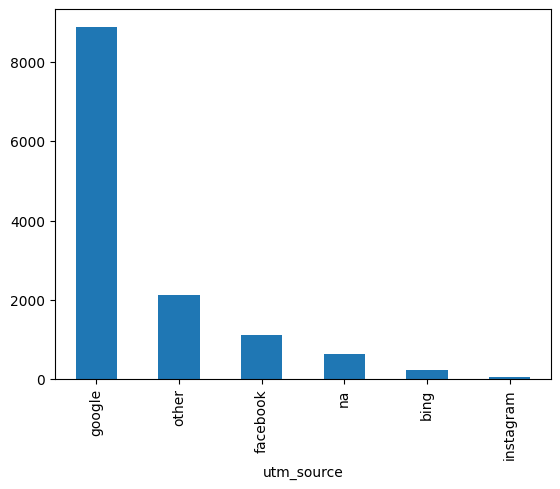

In [90]:
search_log_session['utm_source'].value_counts().plot(kind='bar')

In [97]:
search_log_session['utm_medium'].value_counts()

utm_medium
cpc         8423
organic     1704
(none)      1693
referral     376
ct           170
offline       24
email         22
paid           2
Name: count, dtype: int64

In [96]:
# for hotel_3, drop the 'teszt' row:
#search_log_session.drop(index = search_log_session[search_log_session['utm_medium'] == 'teszt'].index, axis=0, inplace=True)

In [9]:
# Define conditions
#conditions = [
#    search_log_session['utm_medium'].str.contains('none')]

# Define corresponding categories
#choices = ['direct', 'instagram', 'google', 'bing', 'na']

In [98]:
search_log_session['utm_medium'].fillna('na', inplace=True)
search_log_session['utm_medium'].replace('(none)', 'direct', inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11042/1272943054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  search_log_session['utm_medium'].fillna('na', inplace=True)


In [99]:
search_log_session['utm_medium'].value_counts()

utm_medium
cpc         8423
organic     1704
direct      1693
na           633
referral     376
ct           170
offline       24
email         22
paid           2
Name: count, dtype: int64

In [100]:
search_log_session['utm_campaign'].value_counts()

utm_campaign
(not set)                                 11575
campaign_1                                  936
hirlevel_c6                                 138
hu_brand                                     91
campaign_2                                   72
HU                                           59
hu_pmax_brand                                30
campaign_10                                  22
(not+set)                                    19
campaign_15                                  19
hirlevel_c5                                  12
AT                                           10
campaign_5                                    7
campaign_14                                   6
campaign_8                                    6
hirlevel_c2                                   5
campaign_6                                    4
campaign_4                                    4
hirlevel_c1                                   3
loyalty-email                                 3
campaign_11                

In [101]:
search_log_session['utm_campaign'].fillna('na', inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11042/3715448477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  search_log_session['utm_campaign'].fillna('na', inplace=True)


In [102]:
search_log_session['utm_campaign'].replace({'(not set)':'no_camp'}, inplace=True)
search_log_session['utm_campaign'].replace({'(not+set)':'no_camp'}, inplace=True)
search_log_session.loc[search_log_session['utm_campaign'].str.contains('hirlevel'), 'utm_campaign'] = 'hirlevel_camp'
search_log_session.loc[search_log_session['utm_campaign'].str.contains('campaign'), 'utm_campaign'] = 'other_camp'

In [103]:
search_log_session['utm_campaign'].value_counts()

utm_campaign
no_camp                                   11594
other_camp                                 1082
hirlevel_camp                               161
hu_brand                                     91
HU                                           59
hu_pmax_brand                                30
na                                           11
AT                                           10
loyalty-email                                 3
proposal-by-phone                             2
HU I PERF I Display I Fagus lombhullás        2
DE                                            1
feliratkozas_hu                               1
Name: count, dtype: int64

In [104]:
search_log_session['hotel_id'] = hotel_num    # add hotel_id variable

In [105]:
search_log_session.head()

,id,uuid,session_id,utm_source,utm_medium,utm_campaign,hotel_id
0,4255,1534019404.1726608826,1726610240,na,na,no_camp,hotel_3
1,4257,1544215904.1725304369,1726613742,google,organic,no_camp,hotel_3
2,4258,2122792873.1726614284,1726614307,google,cpc,no_camp,hotel_3
3,4259,85389975.1726614091,1726614366,google,cpc,no_camp,hotel_3
4,4260,85389975.1726614091,1726618263,google,cpc,no_camp,hotel_3


In [106]:
# Export the cleaned table
search_log_session.to_csv('./../data-clean/'+hotel_num+'/search_log_session.csv', mode='x')

## search_log

In [107]:
search_log.head()

,id,search_log_session_id,utc_datetime,lang_code,currency,arrival,departure,days,nights,adults,children,conversion,total_price_final
0,129533,4255,2024-09-17 22:13:49,hu,HUF,2024-10-26,2024-10-29,4,3,1,1,NaN,NaN
1,129534,4255,2024-09-17 22:15:04,hu,HUF,2024-12-30,2025-01-01,3,2,1,0,NaN,NaN
2,129535,4257,2024-09-17 22:55:42,en,EUR,2024-10-30,2024-11-02,4,3,2,1,NaN,NaN
3,129536,4257,2024-09-17 22:57:04,en,EUR,2024-10-30,2024-11-02,4,3,2,0,NaN,NaN
4,129537,4257,2024-09-17 22:57:37,en,EUR,2024-10-30,2024-11-02,4,3,2,0,NaN,NaN


In [108]:
search_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     21662 non-null  int64  
 1   search_log_session_id  21662 non-null  int64  
 2   utc_datetime           21662 non-null  object 
 3   lang_code              21662 non-null  object 
 4   currency               21662 non-null  object 
 5   arrival                21662 non-null  object 
 6   departure              21662 non-null  object 
 7   days                   21662 non-null  int64  
 8   nights                 21662 non-null  int64  
 9   adults                 21662 non-null  int64  
 10  children               21662 non-null  int64  
 11  conversion             664 non-null    float64
 12  total_price_final      664 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 2.1+ MB


In [109]:
search_log['days'].value_counts()

days
3     10557
4      6144
2      2286
5      1873
6       358
8       162
7       129
1        59
13       21
9        17
11       13
12       10
15       10
10        9
16        3
28        2
14        2
38        1
30        1
43        1
34        1
19        1
31        1
17        1
Name: count, dtype: int64

In [110]:
# remove outlier rows (where stay parameters are extremes, that are not relevant for this analysis)
search_log.drop(search_log[search_log['days'] > 10].index, inplace=True)

In [111]:
search_log['adults'].value_counts()

adults
2     18273
3       985
4       949
1       918
6       184
5       173
8        48
7        30
10       19
9        14
13        1
Name: count, dtype: int64

In [112]:
search_log.drop(search_log[search_log['adults'] > 6].index, inplace=True)

In [113]:
search_log['conversion'].fillna(0, inplace=True) # replace NaNs to 0, where is no conversion

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11042/232601709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  search_log['conversion'].fillna(0, inplace=True) # replace NaNs to 0, where is no conversion


In [114]:
search_log['total_price_final'].fillna(0, inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11042/3524563653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  search_log['total_price_final'].fillna(0, inplace=True)


In [115]:
search_log['hotel_id'] = hotel_num    # add hotel_id variable
search_log.head()

,id,search_log_session_id,utc_datetime,lang_code,currency,arrival,departure,days,nights,adults,children,conversion,total_price_final,hotel_id
0,129533,4255,2024-09-17 22:13:49,hu,HUF,2024-10-26,2024-10-29,4,3,1,1,0.0,0.0,hotel_3
1,129534,4255,2024-09-17 22:15:04,hu,HUF,2024-12-30,2025-01-01,3,2,1,0,0.0,0.0,hotel_3
2,129535,4257,2024-09-17 22:55:42,en,EUR,2024-10-30,2024-11-02,4,3,2,1,0.0,0.0,hotel_3
3,129536,4257,2024-09-17 22:57:04,en,EUR,2024-10-30,2024-11-02,4,3,2,0,0.0,0.0,hotel_3
4,129537,4257,2024-09-17 22:57:37,en,EUR,2024-10-30,2024-11-02,4,3,2,0,0.0,0.0,hotel_3


In [116]:
# Export the cleaned table
search_log.to_csv('./../data-clean/'+hotel_num+'/search_log.csv', mode='x')

## search_log_room

In [101]:
search_log_room

,id,search_log_id,adults,children,picked_room,picked_price,picked_room.1
0,5755,129533,1,1,NaN,NaN,NaN
1,5756,129534,1,0,NaN,NaN,NaN
2,5757,129535,2,1,NaN,NaN,NaN
3,5758,129536,2,0,NaN,NaN,NaN
4,5759,129537,2,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23980,41857,163179,2,2,NaN,NaN,NaN
23981,41858,163180,2,2,NaN,NaN,NaN
23982,42203,163525,2,2,NaN,NaN,NaN
23983,42204,163526,2,2,NaN,NaN,NaN


In [102]:
search_log_room.drop(columns='picked_room', axis=1, inplace=True) # drop the first picked_room column, as only the second matters

In [103]:
search_log_room.drop(index=search_log_room[search_log_room['children'] > 3].index, inplace=True) # remove where children > 3

In [104]:
search_log_room.rename(columns={'picked_room.1': 'picked_room'}, inplace=True) # rename the column name

In [105]:
search_log_room['hotel_id'] = hotel_num    # add hotel_id variable
search_log_room.head()

,id,search_log_id,adults,children,picked_price,picked_room,hotel_id
0,5755,129533,1,1,NaN,NaN,hotel_3
1,5756,129534,1,0,NaN,NaN,hotel_3
2,5757,129535,2,1,NaN,NaN,hotel_3
3,5758,129536,2,0,NaN,NaN,hotel_3
4,5759,129537,2,0,NaN,NaN,hotel_3


In [106]:
# Export the cleaned table
search_log_room.to_csv('./../data-clean/'+hotel_num+'/search_log_room.csv', mode='x')

## search_log_room_child

In [120]:
search_log_room_child.head()

,id,search_log_room_id,age,baby_bed
0,1220,5755,10,0
1,1221,5757,13,0
2,1222,5769,4,0
3,1223,5770,6,0
4,1224,5771,6,0


In [121]:
search_log_room_child['hotel_id'] = hotel_num    # add hotel_id variable
search_log_room_child.head()

,id,search_log_room_id,age,baby_bed,hotel_id
0,1220,5755,10,0,hotel_3
1,1221,5757,13,0,hotel_3
2,1222,5769,4,0,hotel_3
3,1223,5770,6,0,hotel_3
4,1224,5771,6,0,hotel_3


In [122]:
# Export the cleaned table
search_log_room_child.to_csv('./../data-clean/'+hotel_num+'/search_log_room_child.csv', mode='x')

## search_log_room_offer

In [188]:
search_log_room_offer

,id,search_log_id,search_log_room_id,room_code,room_price_min,room_price_max
0,14956,129533,5755,ROOMCC,197982.0,197982.0
1,14957,129533,5755,ROOMBB,172278.0,172278.0
2,14958,129533,5755,ROOMGG,401778.0,401778.0
3,14959,129534,5756,ROOMCC,266526.0,266526.0
4,14960,129534,5756,ROOMBB,231948.0,231948.0
...,...,...,...,...,...,...
104207,168664,163178,41856,ROOMEE,176256.0,176256.0
104208,168665,163179,41857,ROOMGG,173366.0,187728.0
104209,168666,163179,41857,ROOMFF,197802.0,212918.0
104210,168667,163180,41858,ROOMGG,215490.0,215490.0


In [189]:
search_log_room_offer[search_log_room_offer["room_price_min"] > 1500000]

,id,search_log_id,search_log_room_id,room_code,room_price_min,room_price_max
971,15955,129735,5968,ROOMCC,1749600.0,1963728.0
972,15956,129735,5968,ROOMBB,1522260.0,1709748.0
973,15957,129735,5968,ROOMAA,1749600.0,1963728.0
974,15958,129735,5968,ROOMFF,3044520.0,3410496.0
975,15959,129735,5968,ROOMDD,2129220.0,2387844.0
976,15960,129735,5968,ROOMEE,2740770.0,3071142.0
16276,39423,134680,11222,ROOMGG,1681632.0,2111040.0
16277,39424,134680,11222,ROOMEE,1728288.0,2169360.0
16614,41270,135089,11636,ROOMGG,1834439.0,1834439.0
16615,41271,135089,11636,ROOMAA,1624890.0,1624890.0


In [190]:
search_log_room_offer['hotel_id'] = hotel_num    # add hotel_id variable
search_log_room_offer.head()

,id,search_log_id,search_log_room_id,room_code,room_price_min,room_price_max,hotel_id
0,14956,129533,5755,ROOMCC,197982.0,197982.0,hotel_3
1,14957,129533,5755,ROOMBB,172278.0,172278.0,hotel_3
2,14958,129533,5755,ROOMGG,401778.0,401778.0,hotel_3
3,14959,129534,5756,ROOMCC,266526.0,266526.0,hotel_3
4,14960,129534,5756,ROOMBB,231948.0,231948.0,hotel_3


In [191]:
# Export the cleaned table
search_log_room_offer.to_csv('./../data-clean/'+hotel_num+'/search_log_room_offer.csv', mode='x')

## upsell_data

In [123]:
upsell_data['hotel_id'] = hotel_num    # add hotel_id variable
upsell_data.head()

,search_log_id,upsell_type,name,unit_price,pieces,sum_price,hotel_id
0,129894,12,MEDI40_EN,37.8,2,75.6,hotel_3
1,130637,12,MEDI40_HU,13600.0,1,13600.0,hotel_3
2,132560,13,SUMCSOB90_DE,55.3,1,55.3,hotel_3
3,132895,2,PROS_HU,10990.0,1,10990.0,hotel_3
4,132895,9,NONABAR_HU,8990.0,1,8990.0,hotel_3


In [124]:
# Export the cleaned table
upsell_data.to_csv('./../data-clean/'+hotel_num+'/upsell_data.csv', mode='x')

## booking_data

In [126]:
booking_data['hotel_id'] = hotel_num    # add hotel_id variable
booking_data.head()

,search_log_id,total_price_final,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total,hotel_id
0,129649,82653.2,112607.20,0.0,0,11260.00,18694.0,hotel_3
1,129640,161892.0,185435.56,0.0,0,18543.56,5000.0,hotel_3
2,129730,85117.0,122352.22,0.0,0,12235.22,25000.0,hotel_3
3,129772,1700.0,141700.00,0.0,140000,0.00,0.0,hotel_3
4,129888,177358.0,197064.44,0.0,0,19706.44,0.0,hotel_3


In [127]:
# Export the cleaned table
booking_data.to_csv('./../data-clean/'+hotel_num+'/booking_data.csv', mode='x')

## daily_occupancy

In [128]:
daily_occupancy['hotel_id'] = hotel_num    # add hotel_id variable
daily_occupancy.head()

,recording_date,subject_date,fill_rate,hotel_id
0,2024-09-18,2024-09-18,94.737,hotel_3
1,2024-09-18,2024-09-19,85.088,hotel_3
2,2024-09-18,2024-09-20,98.246,hotel_3
3,2024-09-18,2024-09-21,81.579,hotel_3
4,2024-09-18,2024-09-22,62.281,hotel_3


In [129]:
# Export the cleaned table
daily_occupancy.to_csv('./../data-clean/'+hotel_num+'/daily_occupancy.csv', mode='x')

## Read rest of the tables

In [130]:
table_names = ['daily_ppc_budget', 'datepicker_daily_visitors']

for x in table_names:
    globals()[x] = pd.read_csv('./../data-raw/'+hotel_num+'/'+x+'_'+hotel_num+'.csv', sep=',')

## daily_ppc_budget

In [131]:
daily_ppc_budget.rename(columns={'Unnamed: 0':'date'}, inplace=True) # rename the columns

In [132]:
from datetime import datetime
# convert the date format to YYYY-MM-DD
daily_ppc_budget['date'] = pd.to_datetime(daily_ppc_budget['date'], format='%Y.%m.%d.').dt.strftime('%Y-%m-%d')

In [133]:
daily_ppc_budget['hotel_id'] = hotel_num    # add hotel_id variable
daily_ppc_budget.head()

,date,daily_google_spend,daily_microsoft_spend,daily_meta_spend,hotel_id
0,2024-09-18,103187,13076,28788,hotel_3
1,2024-09-19,105303,19576,64102,hotel_3
2,2024-09-20,104991,20604,73873,hotel_3
3,2024-09-21,98337,12220,27476,hotel_3
4,2024-09-22,113580,13024,36343,hotel_3


In [134]:
# Export the cleaned table
daily_ppc_budget.to_csv('./../data-clean/'+hotel_num+'/daily_ppc_budget.csv', mode='x')

## datepicker_daily_visitors

In [135]:
datepicker_daily_visitors.rename(columns={'Dátum':'date', 'Felhasználók teljes száma':'total_users', 'Munkamenetek': 'num_of_sessions'}, inplace=True) # rename the columns

In [136]:
# map Hungarian month codes to numbers
month_map = {
    'jan.': '01', 'febr.': '02', 'márc.': '03', 'ápr.': '04', 'máj.': '05', 'jún.': '06',
    'júl.': '07', 'aug.': '08', 'szept.': '09', 'okt.': '10', 'nov.': '11', 'dec.': '12'
}

# Replace Hungarian month names with numbers
for hun_month, num_month in month_map.items():
    datepicker_daily_visitors['date'] = datepicker_daily_visitors['date'].str.replace(hun_month, num_month+'.', regex=True)

# strip spaces
datepicker_daily_visitors['date'].str.replace(' ', '')
# convert to 'YYYY-MM-DD' format
datepicker_daily_visitors['date'] = pd.to_datetime(datepicker_daily_visitors['date'], format='%Y. %m. %d.').dt.strftime('%Y-%m-%d')


In [137]:
datepicker_daily_visitors['hotel_id'] = hotel_num    # add hotel_id variable
datepicker_daily_visitors.head()

,date,total_users,num_of_sessions,hotel_id
0,2024-09-18,385,421,hotel_3
1,2024-09-19,425,472,hotel_3
2,2024-09-20,298,319,hotel_3
3,2024-09-21,307,350,hotel_3
4,2024-09-22,368,393,hotel_3


In [138]:
# Export the cleaned table
datepicker_daily_visitors.to_csv('./../data-clean/'+hotel_num+'/datepicker_daily_visitors.csv', mode='x')

## website_daily_users

<Axes: xlabel='user_count', ylabel='session_count'>

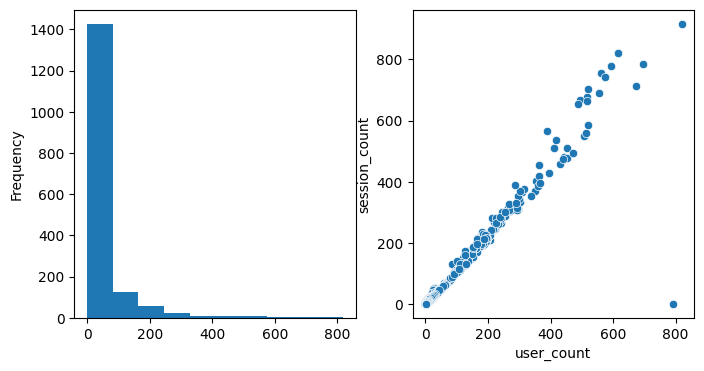

In [139]:
# check the fault outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
website_daily_users['user_count'].plot(ax=ax1, kind='hist')
sns.scatterplot(ax=ax2, data=website_daily_users, x='user_count', y='session_count')

In [140]:
# drop the potentially false outlier
website_daily_users.drop(index= website_daily_users[website_daily_users['user_count'] == 791].index, inplace=True)

<Axes: xlabel='user_count', ylabel='session_count'>

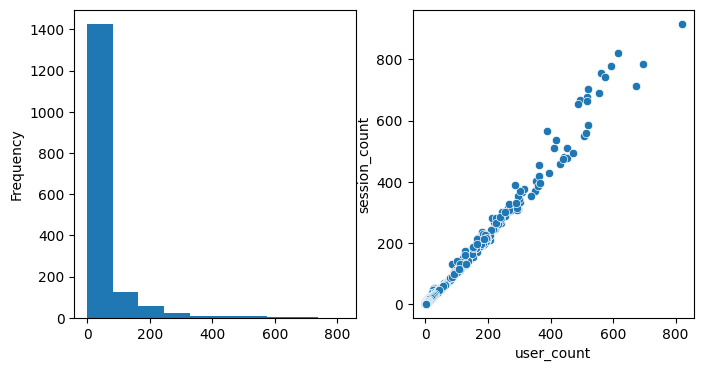

In [141]:
# check the fault outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
website_daily_users['user_count'].plot(ax=ax1, kind='hist')
sns.scatterplot(ax=ax2, data=website_daily_users, x='user_count', y='session_count')

In [142]:
# separate utm medium and source
website_daily_users[['utm_source','utm_medium']] = website_daily_users['utm_source_and_medium'].str.split(' / ', n=1, expand=True)

In [143]:
# "referral" typically indicates traffic coming from external websites that link to your site, but aren’t search engines or paid ads
# Examples: Links from blogs, online reviews, media articles, directories, and other third-party websites.

def replace_missing(utm_medium, utm_campaign):
    if (utm_medium == None) & (utm_campaign == '(referral)'):
        return 'referral'
    elif (utm_medium == None) & ('hirlevel' in utm_campaign):
        return 'newsletter'
    elif (utm_medium == None) & (utm_campaign == '(not set)'):
        return '(not set)'
    else:
        return utm_medium

website_daily_users['utm_medium'] = website_daily_users[['utm_medium','utm_campaign']].apply(lambda row: replace_missing(row['utm_medium'], row['utm_campaign']), axis=1)

In [144]:
website_daily_users.drop(columns='utm_source_and_medium', inplace=True)

<Axes: xlabel='utm_source'>

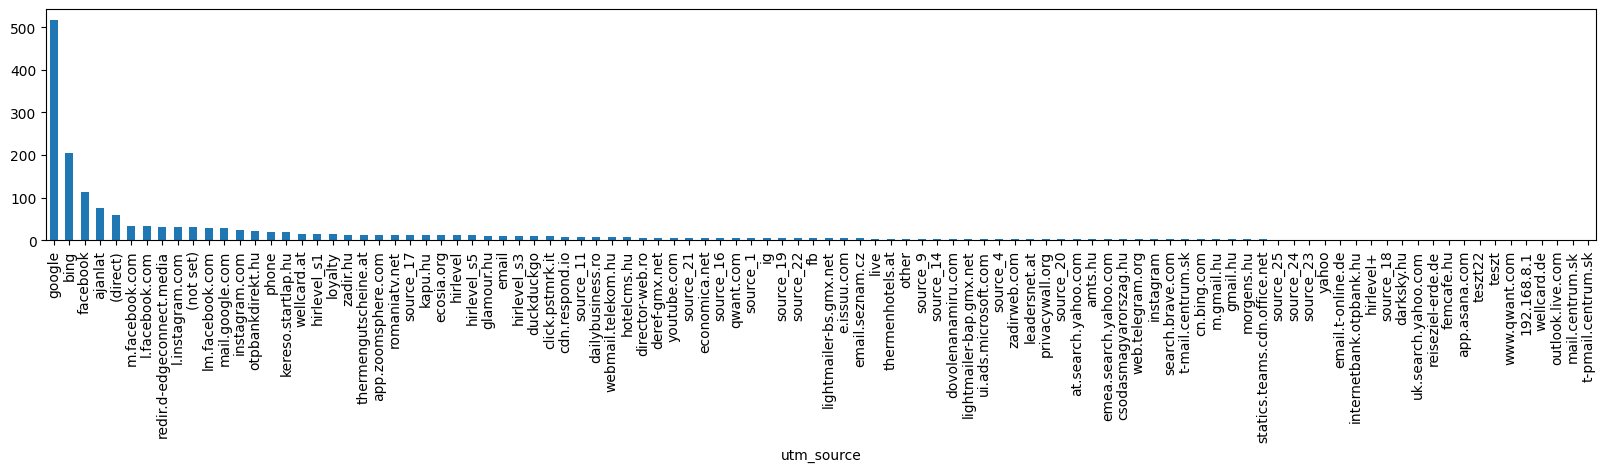

In [145]:
website_daily_users['utm_source'].value_counts().plot(kind='bar', figsize=(20,3))

In [146]:
# reduce the number of categories
#group categories: 
#    facebook
#    instagram
#    msn
#    google

website_daily_users.loc[website_daily_users['utm_source'].str.contains('facebook'), 'utm_source'] = 'facebook'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('instagram'), 'utm_source'] = 'instagram'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('msn'), 'utm_source'] = 'msn'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('google'), 'utm_source'] = 'google'

In [147]:
website_daily_users['utm_source'].value_counts()[:10]

utm_source
google                       545
facebook                     206
bing                         205
ajanlat                       76
(direct)                      58
instagram                     56
redir.d-edgeconnect.media     31
(not set)                     30
otpbankdirekt.hu              22
phone                         20
Name: count, dtype: int64

In [148]:
website_daily_users.dropna(subset='utm_medium', inplace=True, ignore_index=True)

In [149]:
website_daily_users.loc[website_daily_users['utm_campaign'] == '(not+set)', 'utm_campaign'] = '(not set)'

<Axes: xlabel='utm_campaign'>

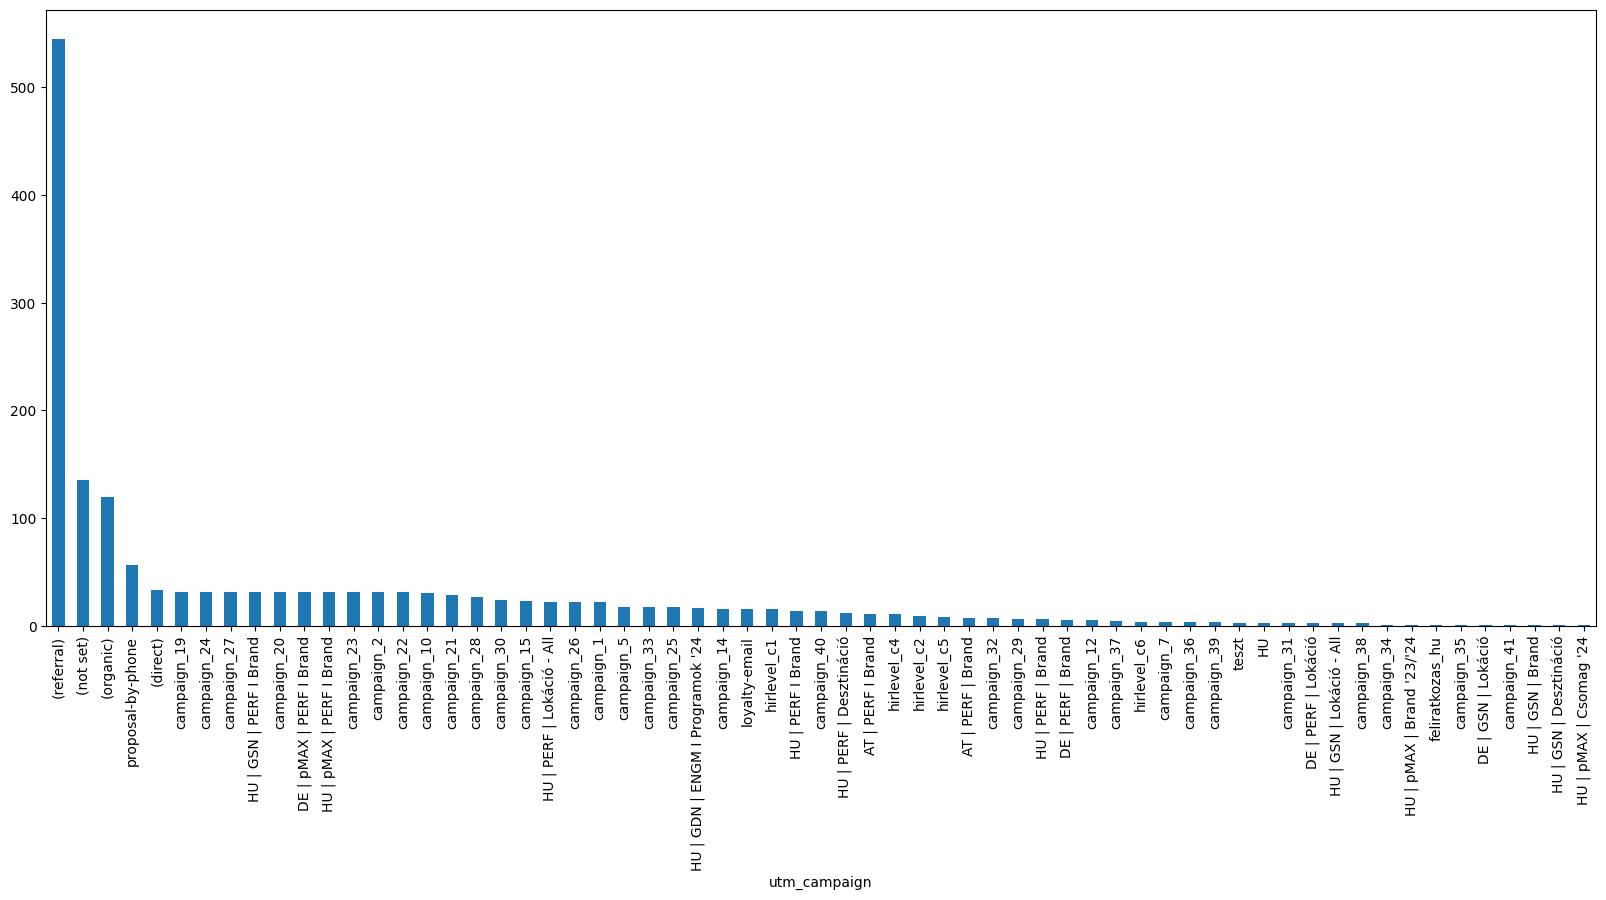

In [150]:
website_daily_users['utm_campaign'].value_counts().plot(kind='bar', figsize=(20,8))

In [151]:
# rearrange columns
website_daily_users = website_daily_users[['date','utm_source','utm_medium', 'utm_campaign', 'user_count', 'session_count']]

In [152]:
website_daily_users['hotel_id'] = hotel_num    # add hotel_id variable
website_daily_users.head()

,date,utm_source,utm_medium,utm_campaign,user_count,session_count,hotel_id
0,2024-09-18,(not set),(not set),(not set),516,676,hotel_3
1,2024-09-18,(direct),(none),(direct),227,260,hotel_3
2,2024-09-18,google,cpc,(organic),221,246,hotel_3
3,2024-09-18,google,cpc,HU | pMAX | PERF I Brand,172,187,hotel_3
4,2024-09-18,google,organic,(organic),153,180,hotel_3


In [153]:
# Export the cleaned table
website_daily_users.to_csv('./../data-clean/'+hotel_num+'/website_daily_users.csv', mode='x')

## website_daily_users for Hotel_2

In [68]:
website_daily_users = pd.read_csv('./../data-raw/'+hotel_num+'/website_daily_users_'+hotel_num+'.csv', sep=';', encoding='ISO-8859-1,')

In [69]:
website_daily_users

,date,utm_source_and_medium,utm_campaign,user_count,session_count
0,2024-09-18,(not set),(not set),425,551
1,2024-09-18,google / cpc,(organic),292,342
2,2024-09-18,google / cpc,(not set),206,232
3,2024-09-18,(direct) / (none),(direct),175,220
4,2024-09-18,google / organic,(organic),145,170
...,...,...,...,...,...
1621,2024-10-18,google / cpc,DE | GSN | PERF I Lokáció,1,1
1622,2024-10-18,hirlevel / ct,campaign_13,1,1
1623,2024-10-18,hirlevel_s3,hirlevel_c3,1,1
1624,2024-10-18,hirlevel / ct,hirlevel_c2,1,1


In [70]:
# separate utm medium and source
website_daily_users[['utm_source','utm_medium']] = website_daily_users['utm_source_and_medium'].str.split(' / ', n=1, expand=True)

In [71]:
# "referral" typically indicates traffic coming from external websites that link to your site, but aren’t search engines or paid ads
# Examples: Links from blogs, online reviews, media articles, directories, and other third-party websites.

def replace_missing(utm_medium, utm_campaign):
    if (utm_medium == None) & (utm_campaign == '(referral)'):
        return 'referral'
    elif (utm_medium == None) & ('hirlevel' in utm_campaign):
        return 'newsletter'
    elif (utm_medium == None) & (utm_campaign == '(not set)') | (utm_campaign == '(not+set)'):
        return '(not set)'
    else:
        return utm_medium

website_daily_users['utm_medium'] = website_daily_users[['utm_medium','utm_campaign']].apply(lambda row: replace_missing(row['utm_medium'], row['utm_campaign']), axis=1)

In [72]:
website_daily_users.drop(columns='utm_source_and_medium', inplace=True)

In [73]:
# reduce the number of categories
#group categories: 
#    facebook
#    instagram
#    msn
#    google
#    yahoo

website_daily_users.loc[website_daily_users['utm_source'].str.contains('facebook'), 'utm_source'] = 'facebook'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('instagram'), 'utm_source'] = 'instagram'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('msn'), 'utm_source'] = 'msn'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('google'), 'utm_source'] = 'google'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('yahoo'), 'utm_source'] = 'yahoo'

<Axes: xlabel='utm_source'>

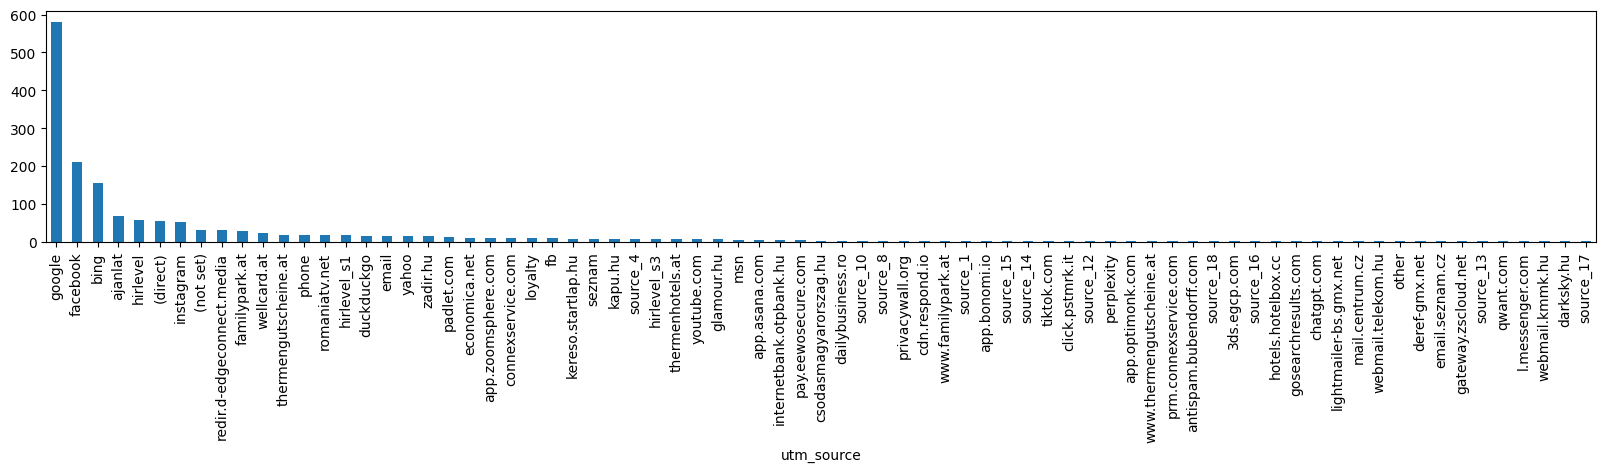

In [74]:
website_daily_users['utm_source'].value_counts().plot(kind='bar', figsize=(20,3))

In [75]:
website_daily_users.dropna(subset='utm_medium', inplace=True, ignore_index=True)

In [76]:
website_daily_users.loc[website_daily_users['utm_campaign'] == '(not+set)', 'utm_campaign'] = '(not set)'

<Axes: xlabel='utm_campaign'>

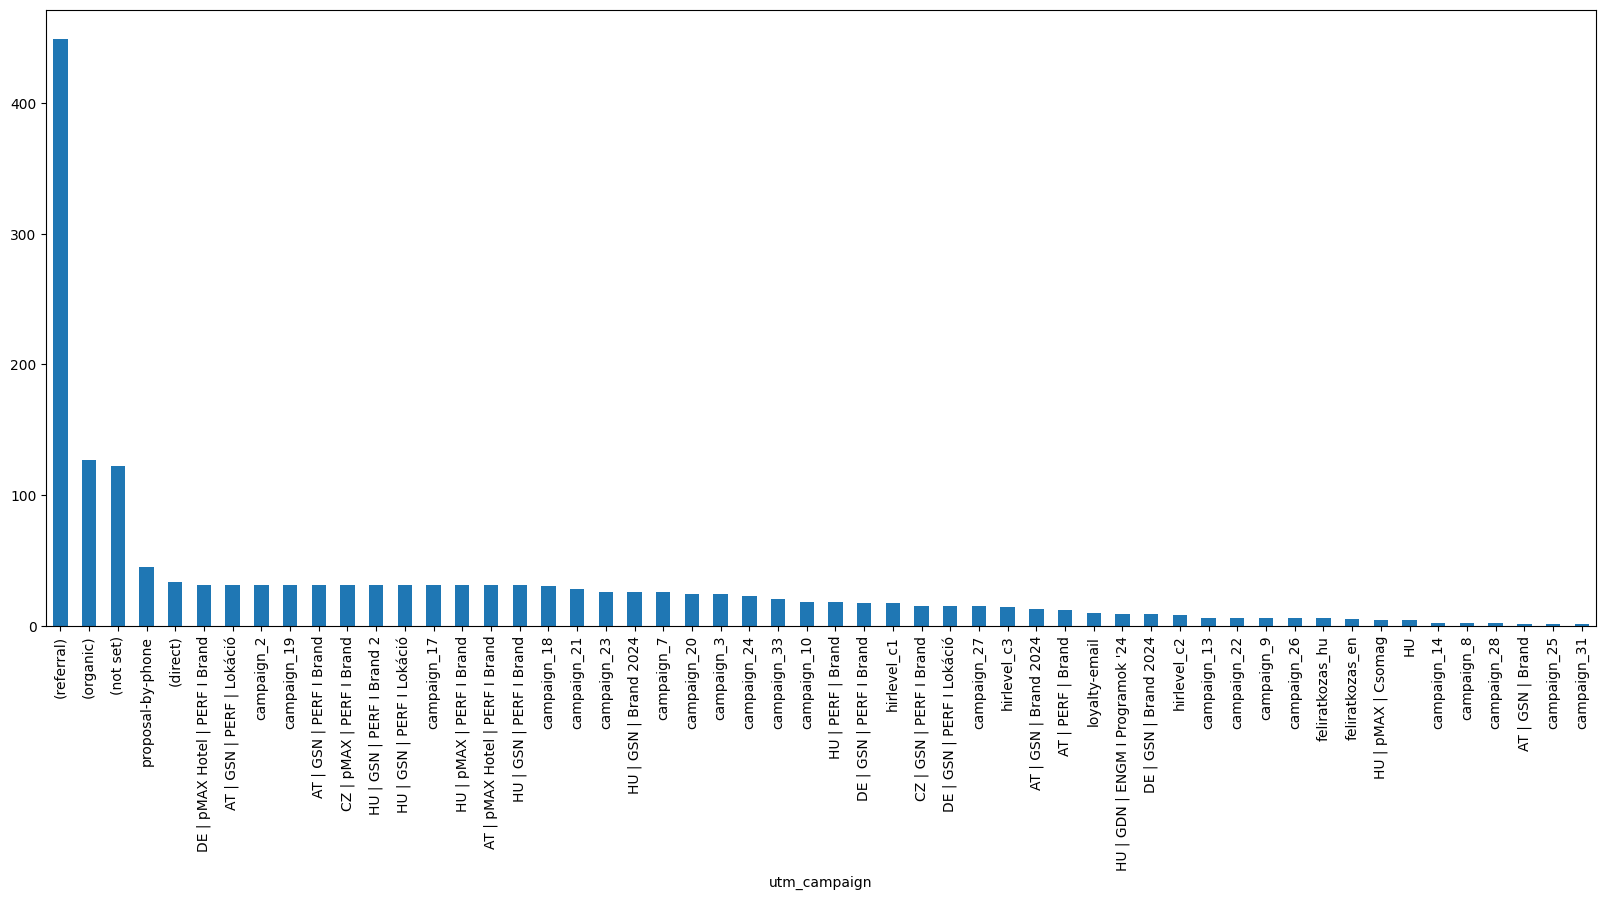

In [77]:
website_daily_users['utm_campaign'].value_counts().plot(kind='bar', figsize=(20,8))

In [78]:
# rearrange columns
website_daily_users = website_daily_users[['date','utm_source','utm_medium', 'utm_campaign', 'user_count', 'session_count']]

In [79]:
website_daily_users['hotel_id'] = hotel_num    # add hotel_id variable
website_daily_users.head()

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11042/4039588559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  website_daily_users['hotel_id'] = hotel_num    # add hotel_id variable


,date,utm_source,utm_medium,utm_campaign,user_count,session_count,hotel_id
0,2024-09-18,(not set),(not set),(not set),425,551,hotel_2
1,2024-09-18,google,cpc,(organic),292,342,hotel_2
2,2024-09-18,google,cpc,(not set),206,232,hotel_2
3,2024-09-18,(direct),(none),(direct),175,220,hotel_2
4,2024-09-18,google,organic,(organic),145,170,hotel_2


In [80]:
# Export the cleaned table
website_daily_users.to_csv('./../data-clean/'+hotel_num+'/website_daily_users.csv', mode='x')

# Concat the tables of different hotels

In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [420]:
table_names = ['search_log_session', 'search_log', 'booking_data', 'search_log_room', 'search_log_room_offer','search_log_room_child', 'upsell_data', 'daily_occupancy', 'website_daily_users', 'daily_ppc_budget', 'datepicker_daily_visitors']

for k in table_names:
    globals()[k] = pd.DataFrame()
    for x in ['1','2','3']:
        actual_table = pd.read_csv('./../data-clean/hotel_'+x+'/'+k+'.csv', sep=',', encoding='ISO-8859-1', index_col='Unnamed: 0')
        globals()[k] = pd.concat([globals()[k], actual_table])

# Join tables for analysis

Joins for conversion analysis
- search_log_session
- search_log
- search_log_room
- search_log_room_child (ha volt gyerek a keresésben, akkor ez tartalmazza)
- upsell_data
- booking_data


Pereferenc analysis (az elérhető szobákból milyen paraméterekkel rendelkezett a végleges választás?):
- search_log_room_offer

## transform tables from long to wide format:

search_log_room_child

In [421]:
search_log_room_child['count'] = search_log_room_child.groupby((search_log_room_child['search_log_room_id'] != search_log_room_child['search_log_room_id'].shift()).cumsum()).cumcount()

In [422]:
search_log_room_child = search_log_room_child.pivot(index=['search_log_room_id','hotel_id'], columns='count', values=['age', 'baby_bed'])
#search_log_room_child.pivot(index=['search_log_room_id','hotel_id'])

#search_log_room_child.pivot_table(index=['search_log_room_id','hotel_id'], columns="baby_bed", aggfunc='first')

In [423]:
search_log_room_child.columns = [(str(col[1])+'_'+col[0]) for col in search_log_room_child.columns]
search_log_room_child.head()

,,0_age,1_age,2_age,3_age,4_age,0_baby_bed,1_baby_bed,2_baby_bed,3_baby_bed,4_baby_bed
search_log_room_id,hotel_id,,,,,,,,,,
3839,hotel_2,14.0,12.0,7.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
3841,hotel_2,1.0,1.0,3.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
3842,hotel_2,6.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3843,hotel_2,6.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3844,hotel_2,9.0,12.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [424]:
search_log_room_child.reset_index(inplace=True)

In [425]:
search_log_room_child['baby_bed'] = search_log_room_child[['0_baby_bed', '1_baby_bed', '2_baby_bed', '3_baby_bed','4_baby_bed']].apply(lambda x: x.sum(), axis=1) # summarize the baby beds

In [426]:
search_log_room_child.drop(columns=['0_baby_bed', '1_baby_bed', '2_baby_bed', '3_baby_bed','4_baby_bed'], inplace=True)

In [427]:
search_log_room_child.sort_values(by=['hotel_id','search_log_room_id'], inplace=True)

search_log_room_offer

In [428]:
# 'search_log_room_offer' long to wide format
search_log_room_offer_w = search_log_room_offer.pivot(index=['search_log_room_id','hotel_id'], columns='room_code', values=['room_price_min','room_price_max'])
search_log_room_offer_w

room_price_min                                   \
room_code                           ROOMAA     ROOMBB     ROOMCC     ROOMDD   
search_log_room_id hotel_id                                                   
3782               hotel_2             NaN  395280.00  337680.00        NaN   
3824               hotel_2       113832.00        NaN        NaN  107712.00   
3837               hotel_2             NaN  328032.00        NaN        NaN   
3838               hotel_2             NaN     476.00        NaN        NaN   
3839               hotel_2             NaN        NaN        NaN        NaN   
...                                    ...        ...        ...        ...   
42655              hotel_1       208080.00  220320.00  183600.00        NaN   
42660              hotel_1       220320.00  232560.00  195840.00        NaN   
42661              hotel_1             NaN  295200.00  252000.00        NaN   
42662              hotel_1          692.58     742.05     593.64     643.11   
42663              hotel_1             NaN        NaN        NaN        NaN   

                                                                        \
room_code                       ROOMEE    ROOMFF     ROOMGG     ROOMHH   
search_log_room_id hotel_id                                              
3782               hotel_2         NaN  424080.0        NaN        NaN   
3824               hotel_2         NaN       NaN  119952.00        NaN   
3837               hotel_2         NaN       NaN        NaN        NaN   
3838               hotel_2         NaN     510.0        NaN        NaN   
3839               hotel_2   409390.80       NaN        NaN  464470.80   
...                                ...       ...        ...        ...   
42655              hotel_1         NaN  159120.0  162792.00  174420.00   
42660              hotel_1         NaN       NaN        NaN        NaN   
42661              hotel_1         NaN  223200.0  227520.00        NaN   
42662              hotel_1      445.23     494.7     509.55     556.53   
42663              hotel_1      697.00     748.0        NaN     811.75   

                            room_price_max                                   \
room_code                           ROOMAA     ROOMBB     ROOMCC     ROOMDD   
search_log_room_id hotel_id                                                   
3782               hotel_2             NaN  395280.00  337680.00        NaN   
3824               hotel_2       113832.00        NaN        NaN  107712.00   
3837               hotel_2             NaN  352520.00        NaN        NaN   
3838               hotel_2             NaN     543.73        NaN        NaN   
3839               hotel_2             NaN        NaN        NaN        NaN   
...                                    ...        ...        ...        ...   
42655              hotel_1       208080.00  220320.00  183600.00        NaN   
42660              hotel_1       220320.00  232560.00  195840.00        NaN   
42661              hotel_1             NaN  319690.00  276488.00        NaN   
42662              hotel_1          800.94     851.94     698.94     749.94   
42663              hotel_1             NaN        NaN        NaN        NaN   

                                                                         
room_code                       ROOMEE     ROOMFF     ROOMGG     ROOMHH  
search_log_room_id hotel_id                                              
3782               hotel_2         NaN  424080.00        NaN        NaN  
3824               hotel_2         NaN        NaN  119952.00        NaN  
3837               hotel_2         NaN        NaN        NaN        NaN  
3838               hotel_2         NaN     578.13        NaN        NaN  
3839               hotel_2   522113.80        NaN        NaN  584708.80  
...                                ...        ...        ...        ...  
42655              hotel_1         NaN  159120.00  162792.00  174420.00  
42660              hotel_1         Na

In [429]:
#a.columns.droplevel()

In [430]:
search_log_room_offer_w.columns = [(col[1]+'_'+col[0]) for col in search_log_room_offer_w.columns]
search_log_room_offer_w.head()

,,ROOMAA_room_price_min,ROOMBB_room_price_min,ROOMCC_room_price_min,ROOMDD_room_price_min,ROOMEE_room_price_min,ROOMFF_room_price_min,ROOMGG_room_price_min,ROOMHH_room_price_min,ROOMAA_room_price_max,ROOMBB_room_price_max,ROOMCC_room_price_max,ROOMDD_room_price_max,ROOMEE_room_price_max,ROOMFF_room_price_max,ROOMGG_room_price_max,ROOMHH_room_price_max
search_log_room_id,hotel_id,,,,,,,,,,,,,,,,
3782,hotel_2,NaN,395280.0,337680.0,NaN,NaN,424080.0,NaN,NaN,NaN,395280.00,337680.0,NaN,NaN,424080.00,NaN,NaN
3824,hotel_2,113832.0,NaN,NaN,107712.0,NaN,NaN,119952.0,NaN,113832.0,NaN,NaN,107712.0,NaN,NaN,119952.0,NaN
3837,hotel_2,NaN,328032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352520.00,NaN,NaN,NaN,NaN,NaN,NaN
3838,hotel_2,NaN,476.0,NaN,NaN,NaN,510.0,NaN,NaN,NaN,543.73,NaN,NaN,NaN,578.13,NaN,NaN
3839,hotel_2,NaN,NaN,NaN,NaN,409390.8,NaN,NaN,464470.8,NaN,NaN,NaN,NaN,522113.8,NaN,NaN,584708.8


In [431]:
search_log_room_offer_w.reset_index(inplace=True)

In [432]:
search_log_room_offer_w.sort_values(by=['hotel_id','search_log_room_id'], inplace=True)

In [433]:
search_log_room_offer_w = search_log_room_offer_w[['search_log_room_id', 'hotel_id', 'ROOMAA_room_price_min', 'ROOMAA_room_price_max',
                                                  'ROOMBB_room_price_min', 'ROOMBB_room_price_max', 'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
                                                  'ROOMDD_room_price_min', 'ROOMDD_room_price_max', 'ROOMEE_room_price_min', 'ROOMEE_room_price_max',
                                                  'ROOMFF_room_price_min', 'ROOMFF_room_price_max', 'ROOMGG_room_price_min', 'ROOMGG_room_price_max',
                                                  'ROOMHH_room_price_min', 'ROOMHH_room_price_max']]

'search_log_room'

In [434]:
# check the duplicates in 'search_log_room'
search_log_room[search_log_room.duplicated(subset=['search_log_id', 'adults', 'children', 'picked_price','picked_room', 'hotel_id'], keep=False)][['adults','children']].describe()

# --> duplicates due to several selected rooms in one booking session (for example, 6x adults in 3 rooms - 2 adults per room)

,adults,children
count,6608.000000,6608.000000
mean,1.784050,0.283747
std,0.531559,0.533000
min,0.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.000000
max,10.000000,3.000000


In [435]:
# new variable --> sel_num_of_rooms
search_log_room['sel_num_of_rooms'] = search_log_room.groupby((search_log_room['search_log_id'] != search_log_room['search_log_id'].shift()).cumsum()).cumcount()+1

'search_log_room' table long to wide format, if 2 or more rooms has been selected:

In [436]:
more_rooms = search_log_room[search_log_room['picked_room'].notna()].pivot(index=['search_log_id','hotel_id'], columns='sel_num_of_rooms', values=['picked_price','picked_room'])
more_rooms.reset_index(inplace=True)

In [437]:
more_rooms.columns = [(str(col[1])+'_'+col[0]) for col in more_rooms.columns]
more_rooms.head()

,_search_log_id,_hotel_id,1_picked_price,2_picked_price,3_picked_price,4_picked_price,5_picked_price,6_picked_price,7_picked_price,1_picked_room,2_picked_room,3_picked_room,4_picked_room,5_picked_room,6_picked_room,7_picked_room
0,76659,hotel_2,510.0,NaN,NaN,NaN,NaN,NaN,NaN,ROOMAA,NaN,NaN,NaN,NaN,NaN,NaN
1,76669,hotel_2,271.8,NaN,NaN,NaN,NaN,NaN,NaN,ROOMBB,NaN,NaN,NaN,NaN,NaN,NaN
2,76674,hotel_2,140288.0,NaN,NaN,NaN,NaN,NaN,NaN,ROOMCC,NaN,NaN,NaN,NaN,NaN,NaN
3,76703,hotel_2,140148.0,NaN,NaN,NaN,NaN,NaN,NaN,ROOMBB,NaN,NaN,NaN,NaN,NaN,NaN
4,76733,hotel_2,109633.0,NaN,NaN,NaN,NaN,NaN,NaN,ROOMBB,NaN,NaN,NaN,NaN,NaN,NaN


In [438]:
more_rooms['picked_price_median']= more_rooms[['1_picked_price', '2_picked_price','3_picked_price', '4_picked_price', '5_picked_price', '6_picked_price','7_picked_price']].median(axis=1)

In [439]:
more_rooms.drop(columns=['1_picked_price', '2_picked_price','3_picked_price', '4_picked_price', '5_picked_price', '6_picked_price','7_picked_price'], inplace=True)

In [440]:
more_rooms['picked_room'] = more_rooms[['1_picked_room', '2_picked_room','3_picked_room','4_picked_room', '5_picked_room', '6_picked_room', '7_picked_room']].apply(lambda x: '-'.join(x.dropna()), axis=1)

In [441]:
more_rooms.drop(columns=['1_picked_room', '2_picked_room', '3_picked_room','4_picked_room', '5_picked_room', '6_picked_room', '7_picked_room'], inplace=True)

In [442]:
more_rooms.sort_values(by=['_hotel_id','_search_log_id'], inplace=True)

In [443]:
search_log_room.drop(columns=['adults','children','picked_price','picked_room'], inplace=True)

In [444]:
search_log_room = pd.merge(search_log_room, more_rooms, left_on=['hotel_id', 'search_log_id'], right_on=['_hotel_id', '_search_log_id'], how='left', validate='m:1').drop(columns=['_search_log_id','_hotel_id'])

## joins:

In [448]:
# merge 'search_log_session' and 'search_log'
merged_df = pd.merge(search_log_session, search_log, left_on=['hotel_id', 'id'], right_on=['hotel_id', 'search_log_session_id'], how='right', validate='1:m')

In [449]:
merged_df.drop(columns='search_log_session_id', inplace=True) # remove the unnecessary and duplicated columns
merged_df.rename(columns={'id_x': 'search_log_session_id', 'id_y':'search_log_id'}, inplace=True)    

In [450]:
# merge 'search_log_room' and 'search_log_room_child'
search_log_room_merged = pd.merge(search_log_room, search_log_room_child, left_on=['hotel_id', 'id'], right_on=['hotel_id', 'search_log_room_id'], how='left', validate='1:1')

In [451]:
search_log_room_merged.drop(columns=['search_log_room_id'], inplace=True) # remove the unnecessary and duplicated columns
search_log_room_merged.rename(columns={'id': 'search_log_room_id'}, inplace=True)

In [452]:
# merge 'search_log_room_merged' and 'search_log_room_offer_w'
search_log_room_merged = pd.merge(search_log_room_merged, search_log_room_offer_w, left_on=['hotel_id','search_log_room_id'], right_on=['hotel_id','search_log_room_id'], how='left', validate='1:1')

In [453]:
# merge 'merged_df' and 'search_log_room_merged'  on 'search_log_id'
merged_df = pd.merge(merged_df, search_log_room_merged.drop_duplicates(subset=['search_log_id','hotel_id'], keep='last'), left_on=['search_log_id','hotel_id'], right_on=['search_log_id','hotel_id'], how='left', validate='1:1')

# duplicates can be 

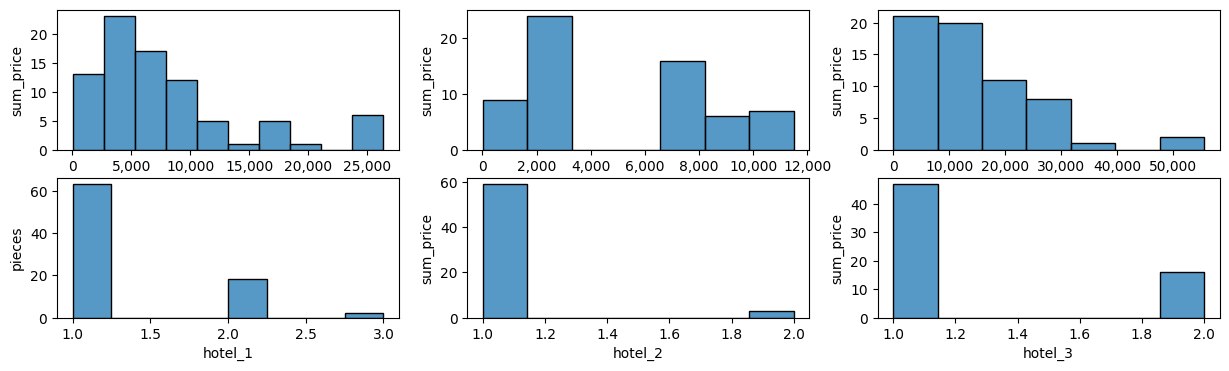

In [454]:
# check the distribution of upsell data by hotels
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,4))
sns.histplot(ax=ax1, data=upsell_data[upsell_data['hotel_id']=='hotel_1']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax4, data=upsell_data[upsell_data['hotel_id']=='hotel_1']['pieces']).set(ylabel='pieces', xlabel='hotel_1')
sns.histplot(ax=ax2, data=upsell_data[upsell_data['hotel_id']=='hotel_2']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax5, data=upsell_data[upsell_data['hotel_id']=='hotel_2']['pieces']).set(ylabel='sum_price', xlabel='hotel_2')
sns.histplot(ax=ax3, data=upsell_data[upsell_data['hotel_id']=='hotel_3']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax6, data=upsell_data[upsell_data['hotel_id']=='hotel_3']['pieces']).set(ylabel='sum_price', xlabel='hotel_3')


ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [455]:
upsell_data.drop(columns=['upsell_type', 'name', 'unit_price'], inplace=True) # keep only the summed upsell price

In [456]:
upsell_data = upsell_data.groupby(by=['hotel_id','search_log_id']).sum().reset_index() # group the upsells for the same booking

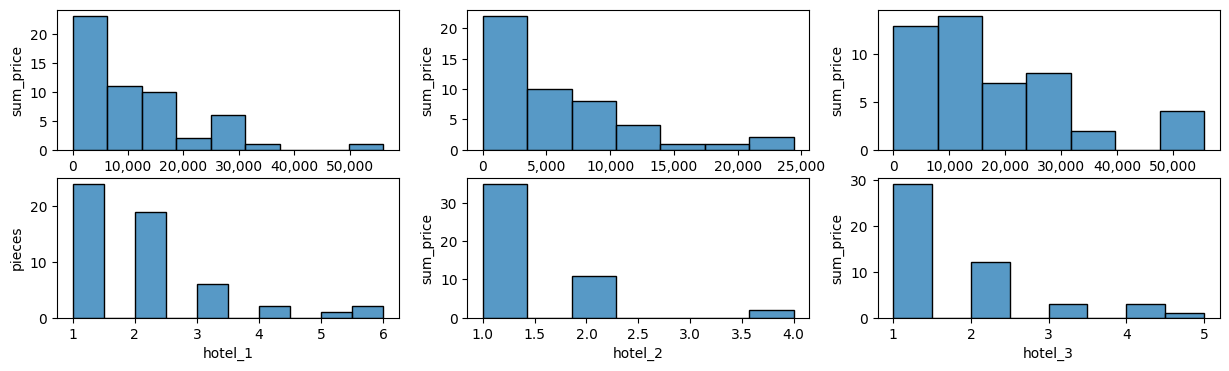

In [457]:
# check the distribution of upsell data for the grouped data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,4))
sns.histplot(ax=ax1, data=upsell_data[upsell_data['hotel_id']=='hotel_1']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax4, data=upsell_data[upsell_data['hotel_id']=='hotel_1']['pieces']).set(ylabel='pieces', xlabel='hotel_1')
sns.histplot(ax=ax2, data=upsell_data[upsell_data['hotel_id']=='hotel_2']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax5, data=upsell_data[upsell_data['hotel_id']=='hotel_2']['pieces']).set(ylabel='sum_price', xlabel='hotel_2')
sns.histplot(ax=ax3, data=upsell_data[upsell_data['hotel_id']=='hotel_3']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax6, data=upsell_data[upsell_data['hotel_id']=='hotel_3']['pieces']).set(ylabel='sum_price', xlabel='hotel_3')


ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [458]:
# merge 'upsell_data'
#search_log_room_merged = 
merged_df = pd.merge(merged_df, upsell_data, left_on=['hotel_id','search_log_id'], right_on=['hotel_id','search_log_id'], how='left', validate='1:1')

In [459]:
# merge with 'booking_data'
final_df = pd.merge(merged_df, booking_data, left_on=['hotel_id','search_log_id'], right_on=['hotel_id','search_log_id'], how='left', validate='1:1')

In [460]:
final_df.head()

,search_log_session_id,uuid,session_id,utm_source,utm_medium,utm_campaign,hotel_id,search_log_id,utc_datetime,lang_code,...,ROOMHH_room_price_min,ROOMHH_room_price_max,pieces,sum_price,total_price_final_y,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total
0,4034.0,1145549807.1726611234,1.726612e+09,na,na,no_camp,hotel_1,112645,2024-09-17 22:19:09,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4037.0,2039466988.1726611511,1.726612e+09,facebook,cpc,other_camp,hotel_1,112648,2024-09-17 22:20:15,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4069.0,1556994523.1726611965,1.726612e+09,google,cpc,na,hotel_1,112680,2024-09-17 22:27:13,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4034.0,1145549807.1726611234,1.726612e+09,na,na,no_camp,hotel_1,112682,2024-09-17 22:28:30,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4102.0,901475575.1726612653,1.726613e+09,google,cpc,na,hotel_1,112714,2024-09-17 22:38:42,en,...,684.25,771.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [465]:
final_df.drop(columns='total_price_final_x', inplace=True)

In [466]:
final_df.head()

,search_log_session_id,uuid,session_id,utm_source,utm_medium,utm_campaign,hotel_id,search_log_id,utc_datetime,lang_code,...,ROOMHH_room_price_min,ROOMHH_room_price_max,pieces,sum_price,total_price_final_y,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total
0,4034.0,1145549807.1726611234,1.726612e+09,na,na,no_camp,hotel_1,112645,2024-09-17 22:19:09,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4037.0,2039466988.1726611511,1.726612e+09,facebook,cpc,other_camp,hotel_1,112648,2024-09-17 22:20:15,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4069.0,1556994523.1726611965,1.726612e+09,google,cpc,na,hotel_1,112680,2024-09-17 22:27:13,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4034.0,1145549807.1726611234,1.726612e+09,na,na,no_camp,hotel_1,112682,2024-09-17 22:28:30,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4102.0,901475575.1726612653,1.726613e+09,google,cpc,na,hotel_1,112714,2024-09-17 22:38:42,en,...,684.25,771.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
search_log_session.set_index('id', inplace=True)
search_log.set_index('id', inplace=True)
#search_log_session.rename(columns=lambda x: 'session_'+x, inplace=True)

In [4]:
search_log

,search_log_session_id,utc_datetime,lang_code,currency,arrival,departure,days,nights,adults,children,conversion,total_price_final
id,,,,,,,,,,,,
112645,4034,2024-09-17 22:19:09,hu,HUF,2024-10-21,2024-10-25,5,4,2,0,NaN,NaN
112648,4037,2024-09-17 22:20:15,hu,HUF,2024-12-19,2024-12-22,4,3,2,1,NaN,NaN
112680,4069,2024-09-17 22:27:13,de,EUR,2024-09-18,2024-09-20,3,2,2,0,NaN,NaN
112682,4034,2024-09-17 22:28:30,hu,HUF,2024-10-21,2024-10-25,5,4,4,0,NaN,NaN
112714,4102,2024-09-17 22:38:42,en,EUR,2024-09-25,2024-09-28,4,3,2,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
146412,28500,2024-10-18 20:57:57,hu,HUF,2024-11-29,2024-12-01,3,2,4,0,NaN,NaN
146417,28505,2024-10-18 21:23:02,hu,HUF,2024-11-15,2024-11-17,3,2,2,2,NaN,NaN
146418,28506,2024-10-18 21:29:09,hu,HUF,2024-10-18,2024-10-20,3,2,2,0,NaN,NaN


In [133]:
session = search_log.join(search_log_session[['session_uuid','session_session_id','session_utm_source','session_utm_medium','session_utm_campaign']], on='search_log_session_id', validate='many_to_one')
session

,search_log_session_id,utc_datetime,lang_code,currency,arrival,departure,days,nights,adults,children,conversion,total_price_final,session_uuid,session_session_id,session_utm_source,session_utm_medium,session_utm_campaign
id,,,,,,,,,,,,,,,,,
112645,4034,2024-09-17 22:19:09,hu,HUF,2024-10-21,2024-10-25,5,4,2,0,NaN,NaN,1145549807.1726611234,1726611549,NaN,NaN,(not set)
112648,4037,2024-09-17 22:20:15,hu,HUF,2024-12-19,2024-12-22,4,3,2,1,NaN,NaN,2039466988.1726611511,1726611615,facebook,cpc,campaign_1
112680,4069,2024-09-17 22:27:13,de,EUR,2024-09-18,2024-09-20,3,2,2,0,NaN,NaN,1556994523.1726611965,1726612033,google,cpc,NaN
112682,4034,2024-09-17 22:28:30,hu,HUF,2024-10-21,2024-10-25,5,4,4,0,NaN,NaN,1145549807.1726611234,1726611549,NaN,NaN,(not set)
112714,4102,2024-09-17 22:38:42,en,EUR,2024-09-25,2024-09-28,4,3,2,0,NaN,NaN,901475575.1726612653,1726612722,google,cpc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146412,28500,2024-10-18 20:57:57,hu,HUF,2024-11-29,2024-12-01,3,2,4,0,NaN,NaN,158647030.1729285048,1729285077,google,cpc,hu_brand
146417,28505,2024-10-18 21:23:02,hu,HUF,2024-11-15,2024-11-17,3,2,2,2,NaN,NaN,357970273.1729286470,1729286582,(direct),(none),(not set)
146418,28506,2024-10-18 21:29:09,hu,HUF,2024-10-18,2024-10-20,3,2,2,0,NaN,NaN,728481387.1729286842,1729286949,google,cpc,hu_brand


join searched room and child data together:

In [134]:
search_log_room.rename(columns=lambda x: 'room_'+x, inplace=True)

In [135]:
search_log_room_child.rename(columns=lambda x: 'child_r_'+x, inplace=True)

In [136]:
search_log_room_child.columns

Index(['child_r_id', 'child_r_search_log_room_id', 'child_r_age',
       'child_r_baby_bed'],
      dtype='object')

In [140]:
searched_room = search_log_room.join(search_log_room_child[['child_r_search_log_room_id','child_r_age','child_r_baby_bed']].set_index('child_r_search_log_room_id'), on='room_id', validate='1:m')

In [149]:
searched_room.drop('room_id', axis=1, inplace=True)

join searched rooms data to main table:

In [150]:
session = session.join(searched_room[['room_search_log_id', 'room_adults', 'room_children',
       'room_picked_room', 'room_picked_price', 'room_picked_room.1',
       'child_r_age', 'child_r_baby_bed']].set_index('room_search_log_id'), validate='1:m')

In [151]:
session

,search_log_session_id,utc_datetime,lang_code,currency,arrival,departure,days,nights,adults,children,...,session_utm_source,session_utm_medium,session_utm_campaign,room_adults,room_children,room_picked_room,room_picked_price,room_picked_room.1,child_r_age,child_r_baby_bed
112645,4034,2024-09-17 22:19:09,hu,HUF,2024-10-21,2024-10-25,5,4,2,0,...,NaN,NaN,(not set),2,0,NaN,NaN,NaN,NaN,NaN
112648,4037,2024-09-17 22:20:15,hu,HUF,2024-12-19,2024-12-22,4,3,2,1,...,facebook,cpc,campaign_1,2,1,NaN,NaN,NaN,3.0,0.0
112680,4069,2024-09-17 22:27:13,de,EUR,2024-09-18,2024-09-20,3,2,2,0,...,google,cpc,NaN,2,0,NaN,NaN,NaN,NaN,NaN
112682,4034,2024-09-17 22:28:30,hu,HUF,2024-10-21,2024-10-25,5,4,4,0,...,NaN,NaN,(not set),4,0,NaN,NaN,NaN,NaN,NaN
112714,4102,2024-09-17 22:38:42,en,EUR,2024-09-25,2024-09-28,4,3,2,0,...,google,cpc,NaN,2,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146417,28505,2024-10-18 21:23:02,hu,HUF,2024-11-15,2024-11-17,3,2,2,2,...,(direct),(none),(not set),2,2,NaN,NaN,NaN,4.0,0.0
146417,28505,2024-10-18 21:23:02,hu,HUF,2024-11-15,2024-11-17,3,2,2,2,...,(direct),(none),(not set),2,2,NaN,NaN,NaN,11.0,0.0
146418,28506,2024-10-18 21:29:09,hu,HUF,2024-10-18,2024-10-20,3,2,2,0,...,google,cpc,hu_brand,2,0,NaN,NaN,NaN,NaN,NaN
146419,28507,2024-10-18 21:42:02,de,EUR,2024-12-15,2024-12-18,4,3,2,0,...,(direct),(none),(not set),2,0,NaN,NaN,NaN,NaN,NaN


join upsell data:

In [156]:
ups = upsell_data[['search_log_id','sum_price']].groupby(by='search_log_id').sum()    #aggregate the upsell discounts for the same users

In [159]:
ups.rename(columns={'sum_price':'upsell_price'}, inplace=True)

In [161]:
session.join(ups, how='left', validate='m:1')

,search_log_session_id,utc_datetime,lang_code,currency,arrival,departure,days,nights,adults,children,...,session_utm_medium,session_utm_campaign,room_adults,room_children,room_picked_room,room_picked_price,room_picked_room.1,child_r_age,child_r_baby_bed,upsell_price
112645,4034,2024-09-17 22:19:09,hu,HUF,2024-10-21,2024-10-25,5,4,2,0,...,NaN,(not set),2,0,NaN,NaN,NaN,NaN,NaN,NaN
112648,4037,2024-09-17 22:20:15,hu,HUF,2024-12-19,2024-12-22,4,3,2,1,...,cpc,campaign_1,2,1,NaN,NaN,NaN,3.0,0.0,NaN
112680,4069,2024-09-17 22:27:13,de,EUR,2024-09-18,2024-09-20,3,2,2,0,...,cpc,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN
112682,4034,2024-09-17 22:28:30,hu,HUF,2024-10-21,2024-10-25,5,4,4,0,...,NaN,(not set),4,0,NaN,NaN,NaN,NaN,NaN,NaN
112714,4102,2024-09-17 22:38:42,en,EUR,2024-09-25,2024-09-28,4,3,2,0,...,cpc,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146417,28505,2024-10-18 21:23:02,hu,HUF,2024-11-15,2024-11-17,3,2,2,2,...,(none),(not set),2,2,NaN,NaN,NaN,4.0,0.0,NaN
146417,28505,2024-10-18 21:23:02,hu,HUF,2024-11-15,2024-11-17,3,2,2,2,...,(none),(not set),2,2,NaN,NaN,NaN,11.0,0.0,NaN
146418,28506,2024-10-18 21:29:09,hu,HUF,2024-10-18,2024-10-20,3,2,2,0,...,cpc,hu_brand,2,0,NaN,NaN,NaN,NaN,NaN,NaN
146419,28507,2024-10-18 21:42:02,de,EUR,2024-12-15,2024-12-18,4,3,2,0,...,(none),(not set),2,0,NaN,NaN,NaN,NaN,NaN,NaN


join booking data:

In [162]:
booking_data.set_index('search_log_id', inplace=True)
booking_data.rename(columns=lambda x: 'bookings_'+x, inplace=True)

In [63]:
booking_data.columns

Index(['bookings_total_price_final', 'bookings_rooms_total_price',
       'bookings_upsell_total_price', 'bookings_vouchers_total_price',
       'bookings_loyalty_discount_total',
       'bookings_redeemed_loyalty_points_total'],
      dtype='object')

In [164]:
session = session.join(booking_data[['bookings_rooms_total_price',
       'bookings_upsell_total_price', 'bookings_vouchers_total_price',
       'bookings_loyalty_discount_total',
       'bookings_redeemed_loyalty_points_total']], validate='m:1')

In [166]:
session.drop('search_log_session_id',axis=1)

,utc_datetime,lang_code,currency,arrival,departure,days,nights,adults,children,conversion,...,room_picked_room,room_picked_price,room_picked_room.1,child_r_age,child_r_baby_bed,bookings_rooms_total_price,bookings_upsell_total_price,bookings_vouchers_total_price,bookings_loyalty_discount_total,bookings_redeemed_loyalty_points_total
112645,2024-09-17 22:19:09,hu,HUF,2024-10-21,2024-10-25,5,4,2,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112648,2024-09-17 22:20:15,hu,HUF,2024-12-19,2024-12-22,4,3,2,1,NaN,...,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN
112680,2024-09-17 22:27:13,de,EUR,2024-09-18,2024-09-20,3,2,2,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112682,2024-09-17 22:28:30,hu,HUF,2024-10-21,2024-10-25,5,4,4,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112714,2024-09-17 22:38:42,en,EUR,2024-09-25,2024-09-28,4,3,2,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146417,2024-10-18 21:23:02,hu,HUF,2024-11-15,2024-11-17,3,2,2,2,NaN,...,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN
146417,2024-10-18 21:23:02,hu,HUF,2024-11-15,2024-11-17,3,2,2,2,NaN,...,NaN,NaN,NaN,11.0,0.0,NaN,NaN,NaN,NaN,NaN
146418,2024-10-18 21:29:09,hu,HUF,2024-10-18,2024-10-20,3,2,2,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146419,2024-10-18 21:42:02,de,EUR,2024-12-15,2024-12-18,4,3,2,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

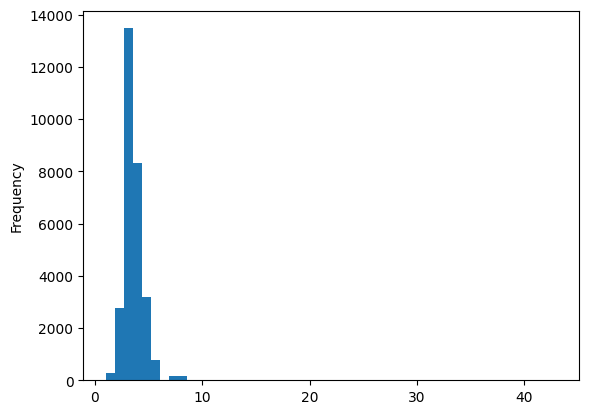

In [170]:
session['days'].plot(kind='hist', bins=50)

In [173]:
session['id'] = session.index

In [189]:
session.reset_index(drop=True, inplace=True)

In [190]:
session_hotel_1 = session.copy()

In [191]:
session_hotel_1[session_hotel_1['room_picked_price'].notna()][['room_picked_price', 'bookings_rooms_total_price']]

,room_picked_price,bookings_rooms_total_price
129,107957.00,119952.22
196,339403.00,377114.44
197,339403.00,377114.44
402,674.19,793.16
411,406944.00,452160.00
...,...,...
29090,241136.00,241136.00
29112,1121.98,1121.98
29113,1121.98,1121.98
29123,96941.00,107712.22
